In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import tensorflow as tf
from tensorflow import keras

In [2]:
model = keras.models.load_model('best-cnn-model.keras')

In [3]:
model.layers

In [5]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [7]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.018926663 0.26062062


Text(0, 0.5, 'count')

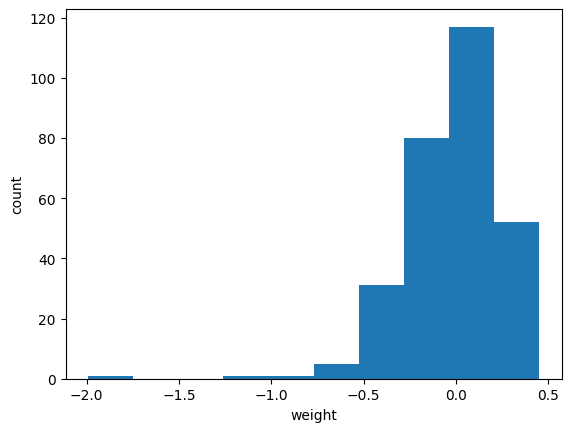

In [8]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

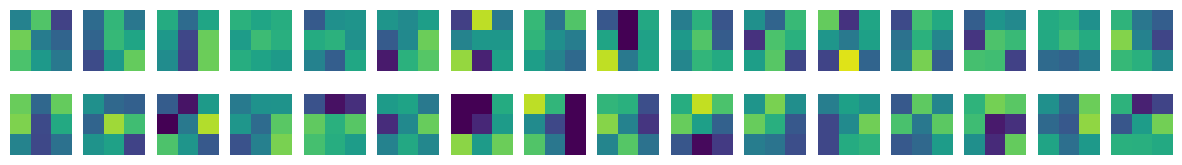

In [11]:
fig, axes = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axes[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
        axes[i, j].axis('off')

In [12]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [13]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [14]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0073557175 0.08364345


Text(0, 0.5, 'count')

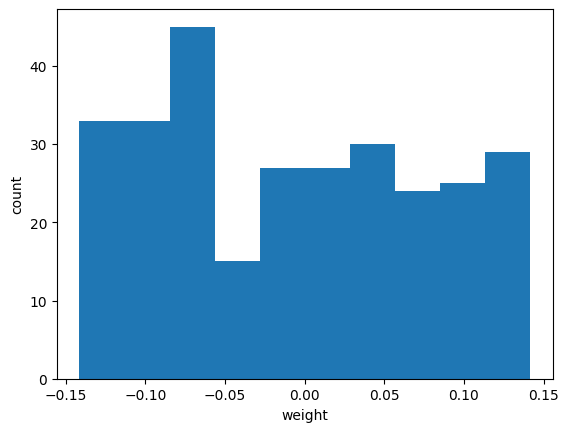

In [15]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')

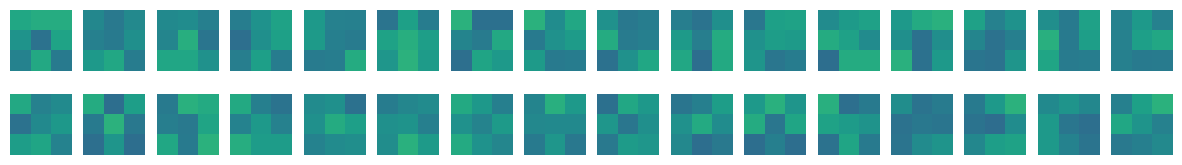

In [17]:
fig, axes = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
    for j in range(16):
        axes[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
        axes[i, j].axis('off')

In [30]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [31]:
conv_acti = keras.Model(model.input, model.layers[0].output)

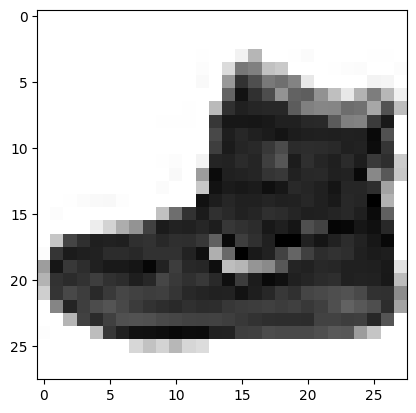

In [32]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')

In [33]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 98ms/step


In [35]:
print(feature_maps.shape)

(1, 28, 28, 32)


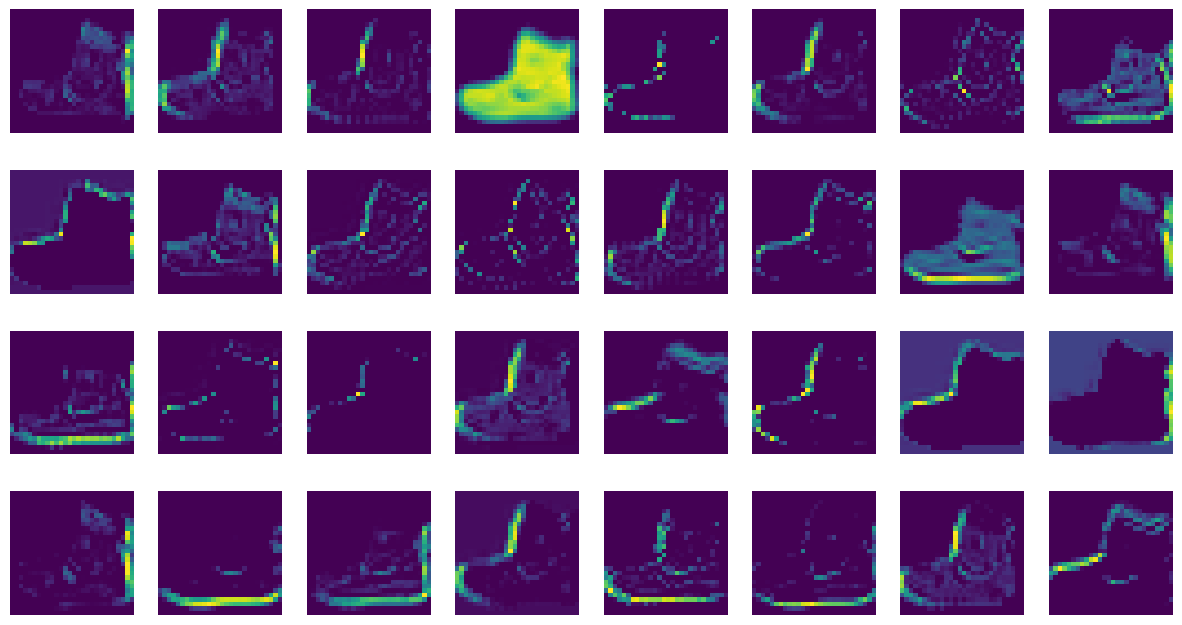

In [36]:
fig, axes = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axes[i, j].axis('off')

In [37]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [38]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 59ms/step


In [39]:
print(feature_maps.shape)

(1, 14, 14, 64)


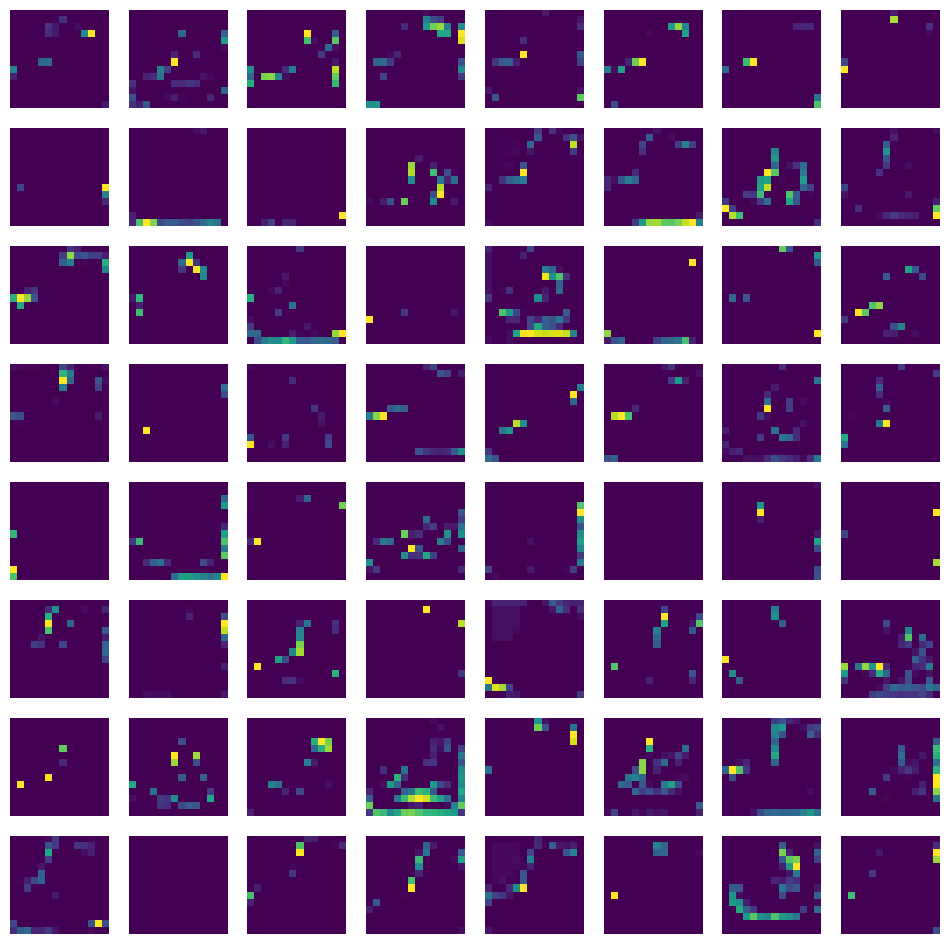

In [40]:
fig, axes = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axes[i, j].axis('off')

In [1]:
import tensorflow
print(tensorflow.__version__)

2.13.0


hello
